In [203]:
#Task-1
#Name: Jofin F Archbald
#About: ML Model which predicts the survival rate of the passengers in the 
#       famous accident of RMS Titanic.
import pandas as pd
import numpy as np


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(300, 0.6, 'RED-All the Women in general')

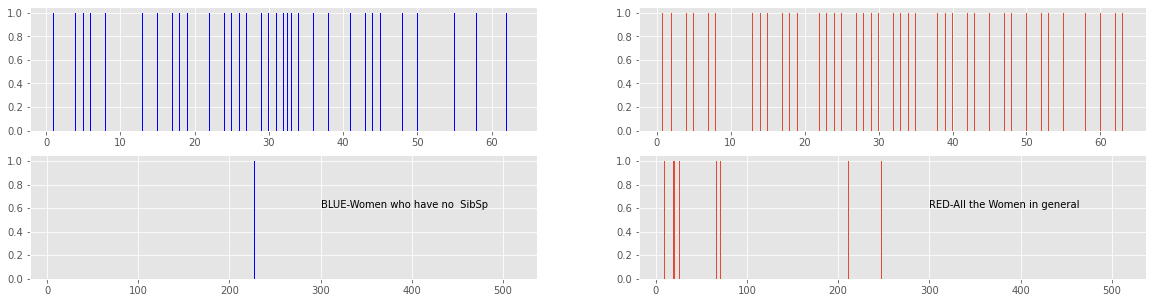

In [206]:
#Here I am graphing out the survival characteristics of the male and female 
#passengers with respect to their Ages and Fares

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

women=data[data.Sex=="female"]
women_Sibsp_none=women[women.SibSp==0]
fig,plot=plt.subplots(2,2,figsize=(20,5))

plot[0,0].bar(women_Sibsp_none.Age,women_Sibsp_none.Survived,width=0.1,color='blue')
plot[0,1].bar(women.Age,women.Survived,width=0.1,)

plot[1,0].bar(women_Sibsp_none.Fare,women_Sibsp_none.Survived,width=0.1,color='blue',)
plot[1,0].annotate('BLUE-Women who have no  SibSp',xy=(300,0.6))
plot[1,1].bar(women.Fare,women.Survived,width=0.1,)
plot[1,1].annotate('RED-All the Women in general',xy=(300,0.6))


We can see that the most of the survived women are single(no siblings or spouse) when their ***Ages*** are considered. That is not the case when their ***Fares*** are considered.



In [207]:
#Checking out for Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
#Fixing all the Null values.(First preprocessing)
age=data.filter(['Age'])
ans=float(int(age.mean()))
age_data=data['Age'].fillna(ans)
data['Age']=age_data
data.dropna(axis=0,subset=["Embarked"],inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [209]:
#Creating a Target
Y=data.filter(['Survived'])
Y=np.array(Y)
Y=np.reshape(Y,(Y.shape[0],))
Y.shape

(889,)

In [210]:
#Selecting the features
X=data.filter(['Sex','Age','Fare','Parch','SibSp','Embarked','Pclass'])
X

,Sex,Age,Fare,Parch,SibSp,Embarked,Pclass
0,male,22.0,7.2500,0,1,S,3
1,female,38.0,71.2833,0,1,C,1
2,female,26.0,7.9250,0,0,S,3
3,female,35.0,53.1000,0,1,S,1
4,male,35.0,8.0500,0,0,S,3
...,...,...,...,...,...,...,...
886,male,27.0,13.0000,0,0,S,2
887,female,19.0,30.0000,0,0,S,1
888,female,29.0,23.4500,2,1,S,3
889,male,26.0,30.0000,0,0,C,1


In [211]:
# the following two cells consist of second preprocessing  of data
dummy=pd.get_dummies(data['Sex'])
dummy_2=pd.get_dummies(data['Embarked'])
X_new=X.filter(['Age','Fare','Parch','SibSp'])
X_new=pd.concat([X_new,dummy,dummy_2],axis='columns')
X_new

,Age,Fare,Parch,SibSp,female,male,C,Q,S
0,22.0,7.2500,0,1,0,1,0,0,1
1,38.0,71.2833,0,1,1,0,1,0,0
2,26.0,7.9250,0,0,1,0,0,0,1
3,35.0,53.1000,0,1,1,0,0,0,1
4,35.0,8.0500,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,0,1,0,0,1
887,19.0,30.0000,0,0,1,0,0,0,1
888,29.0,23.4500,2,1,1,0,0,0,1
889,26.0,30.0000,0,0,0,1,1,0,0


In [0]:
#Creating Training data and Testing data
#Scaling the data so as to inrease the efficiency of  the training process
#(The Age and Fare was varying to abruptly. So it must be scaled down.)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from sklearn.model_selection import train_test_split as ttp
x_train,x_test,y_train,y_test=ttp(X_new,Y,test_size=0.2)
x_test_for_later=x_test # 'x_test_for_later' is for the task.
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [213]:
#Selecting the best estimators for training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score as cvs

estimators=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(n_estimators=100),GaussianNB(),MultinomialNB()]
score=list()
for model in estimators:
  model.fit(x_train,y_train)
  score.append([type(model),' = ',round(cvs(model,x_train,y_train,cv=10).mean()*100,2)])
score

[[sklearn.linear_model._logistic.LogisticRegression, ' = ', 80.45],
 [sklearn.tree._classes.DecisionTreeClassifier, ' = ', 74.83],
 [sklearn.svm._classes.SVC, ' = ', 80.17],
 [sklearn.ensemble._forest.RandomForestClassifier, ' = ', 80.73],
 [sklearn.naive_bayes.GaussianNB, ' = ', 80.16],
 [sklearn.naive_bayes.MultinomialNB, ' = ', 80.02]]

In [214]:
#From this we can see that Random Forest Classifier gives the highest accuracy.
#On scoring with the test data
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)*100

75.28089887640449

In [215]:
#Here I am creating a Confusion Matrix to check out for the false-positve values during prediction.
from sklearn.metrics import confusion_matrix as c_m
con_mat=c_m(model.predict(x_test),y_test)
con_mat

array([[91, 30],
       [14, 43]])

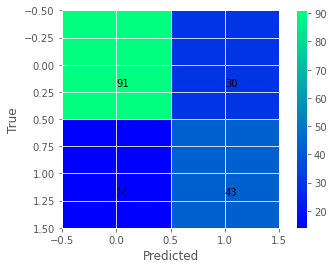

In [216]:
#On graphing the confusion mmatrix on a Heat map
plt.imshow(con_mat,cmap='winter')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.annotate(f"{con_mat[0,0]}",xy=(0.00,0.20),)
plt.annotate(f"{con_mat[0,1]}",xy=(1.00,0.20),)
plt.annotate(f"{con_mat[1,0]}",xy=(0.00,1.20),)
plt.annotate(f"{con_mat[1,1]}",xy=(1.00,1.20),)
plt.show()
#The principle diagonal of the matrix shows that the model predicted correctly.The rest are the false-positive cases.

In [217]:
#Now let's create a test dataset which contains only single women(women with no spouse)
x_test_single_women=x_test_for_later[x_test_for_later.female==1]
x_test_single_women=x_test_single_women[x_test_single_women.SibSp==0]
x_test_single_women.head()

,Age,Fare,Parch,SibSp,female,male,C,Q,S
177,50.0,28.7125,0,0,1,0,1,0,0
653,29.0,7.8292,0,0,1,0,0,1,0
15,55.0,16.0000,0,0,1,0,0,0,1
166,29.0,55.0000,1,0,1,0,0,0,1
651,18.0,23.0000,1,0,1,0,0,0,1


In [218]:
#Now we find the mean of the  probability of survival of the 'single women' passengers.
x_test_single_women=scaler.fit_transform(x_test_single_women)
probs=model.predict_proba(x_test_single_women)
survived_prob=probs[:,1]
survived_prob_mean=round(survived_prob.mean()*100,2)
print(f"{survived_prob_mean} %")

46.56 %


This is the avg probability of survival when women with no Sib/Sp is considered. Their survival chances are quite less (when my model predictions are only considered).

#Note: On the last two cells
The model is trained with all the passenger's considered.And during prediction of probablity the x_test data is filtered out with only single women and then put into it in the last cell

In [0]:
#There are many 'Sources' which gives models of high accuracy.I did not want to copy them, but learnt a lot from them.